# Topic 10: Introduction to Data Visualization

## What do we learn:
* Different libraries for Data Visualization, e.g. Matplotlib, Seaborn
* Initial data exploration visualization
* Apply different visualization techniques based on context and analysis

Import the Bike Sharing Dataset from GoogleDrive

The source of the public dataset in https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

Have look on the dataset and familiarize yourself with the problem!


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

#change the path here to where your dataset is saved on the google drive
df = pd.read_csv('/content/drive/MyDrive/430031 notebooks/Week 10/Data/Bike-Sharing-Day.csv') # Reading the csv file with the help of pandas library
df.head()

,rent date,season,mnth,holiday,weekday,workingday,weathersit,temp normalized,original hum,windspeed,casual users,registered users,total rental bikes
0,1/01/2011,Winter,1,0,6,0,Few clouds,0.344167,80.5833,10.749882,331,654,985
1,2/01/2011,Winter,1,0,0,0,Few clouds,0.363478,69.6087,16.652113,131,670,801
2,3/01/2011,Winter,1,0,1,1,Clear,0.196364,43.7273,16.636703,120,1229,1349
3,4/01/2011,Winter,1,0,2,1,Clear,0.200000,59.0435,10.739832,108,1454,1562
4,5/01/2011,Winter,1,0,3,1,Clear,0.226957,43.6957,12.522300,82,1518,1600


In [6]:
#Transforming the dteday into datetime format
df['rent date'] = pd.to_datetime(df['rent date'], format="%d/%m/%Y")
df.dtypes

rent date             datetime64[ns]
season                        object
mnth                           int64
holiday                        int64
weekday                        int64
workingday                     int64
weathersit                    object
temp normalized              float64
original hum                 float64
windspeed                    float64
casual users                   int64
registered users               int64
total rental bikes             int64
dtype: object

## Import Matplotlib and Seaborn

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## Data exploration of individual features

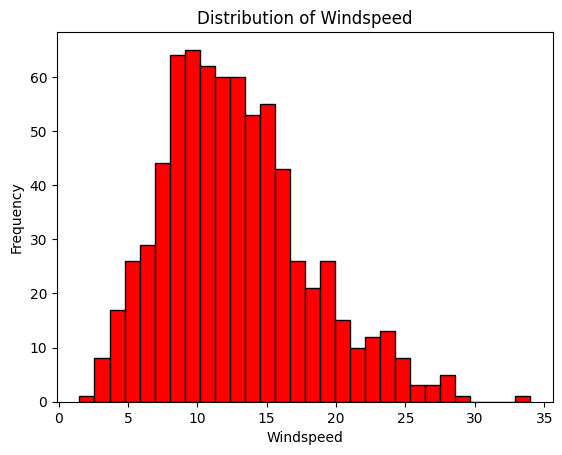

In [9]:
#Question 1: How does the distribution of windspeed look like?
plt.hist(df['windspeed'], bins=30,color='red', edgecolor='black')
plt.title('Distribution of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()

**Interpret**: Rentals are high when the windspeed is 6-15 and less towards the tails

This is a normal distribution, it  is a type of probability distribution where most of the data points cluster around the mean

A normal distribution is typically unimodal, meaning it has one peak


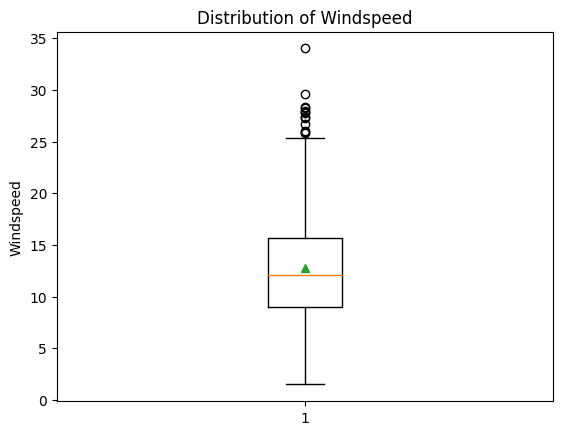

In [11]:
#Question 2: How does the distribution of windspeed look like using boxplot
plt.boxplot(df['windspeed'],showmeans=True)
plt.title('Distribution of Windspeed')
plt.xlabel('')
plt.ylabel('Windspeed')
plt.show()

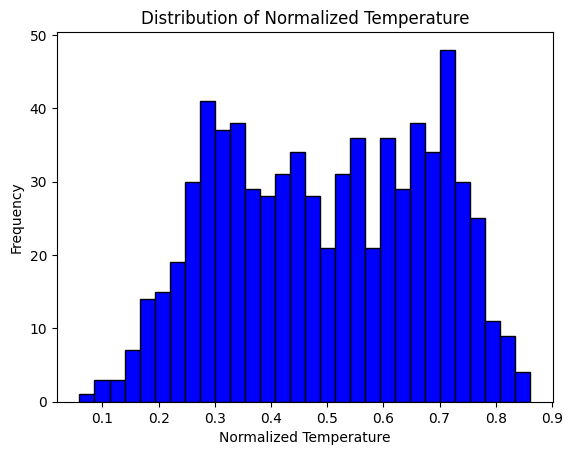

In [8]:
# Question 3: How does the distribution of temperatures look like?
plt.hist(df['temp normalized'], bins=30,color='blue', edgecolor='black')
plt.title('Distribution of Normalized Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Frequency')
plt.show()


**Interpret**: This normal distribution is bimodal, it means that it has two distinct peaks, indicating that there are two groups of data points within the distribution.

We may interpret it as two groups of cyclists: one group prefers cool weather, while the other prefers warm weather.

Rentals are low when is the temp is low or high (on the tails)

season
Fall       841613
Spring     918589
Summer    1061129
Winter     471348
Name: total rental bikes, dtype: int64


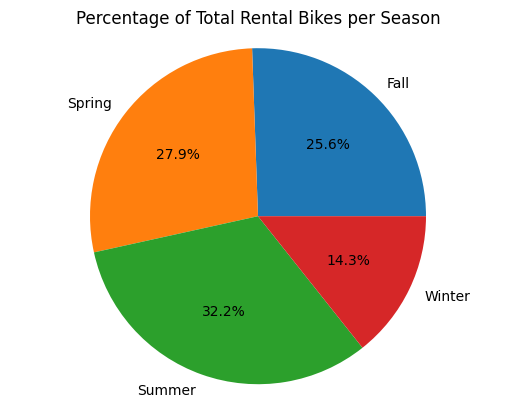

In [29]:
#Question 4: show the Pie chart to show the proportions of total rental bikes per season
# Calculate the total rental bikes per season
total_rental_per_season = df.groupby('season')['total rental bikes'].sum()
print(total_rental_per_season)
# Plot the pie chart use autopct='%1.1f%%' to show percentage
plt.pie(total_rental_per_season, labels=total_rental_per_season.index,autopct='%1.1f%%')
plt.title('Percentage of Total Rental Bikes per Season')
plt.axis('equal')

# Show plot
plt.show()


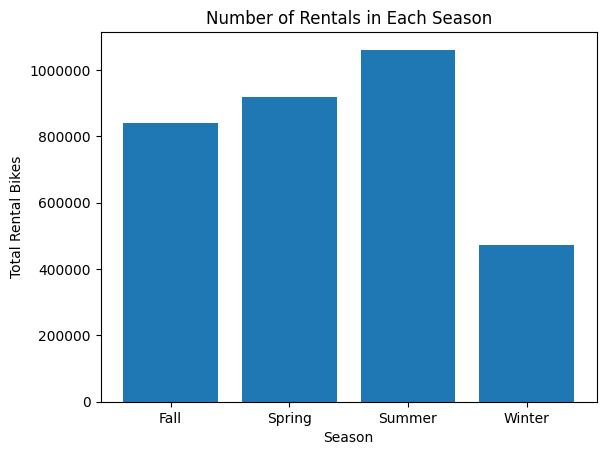

In [34]:
#Question 4: show the bar chart instead of pie

plt.bar(total_rental_per_season.index, total_rental_per_season)
plt.title('Number of Rentals in Each Season')
plt.xlabel('Season')
plt.ylabel('Total Rental Bikes')
# Set y-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.show()


## Relationship between attrbiutes

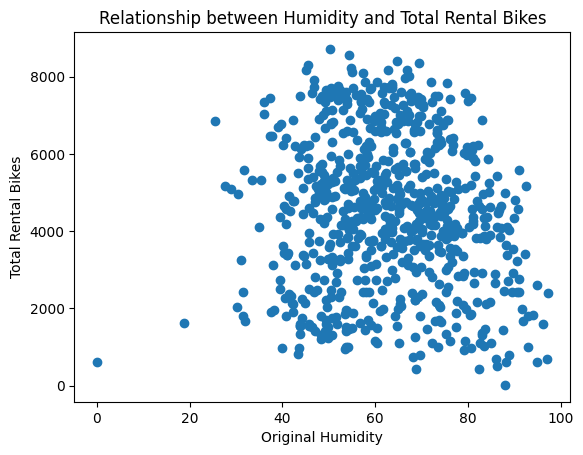

In [35]:
# Question 5: Is there any relationship between humidity and the number of rental bikes?
plt.scatter(df['original hum'], df['total rental bikes'])
plt.title('Relationship between Humidity and Total Rental Bikes')
plt.xlabel('Original Humidity')
plt.ylabel('Total Rental Bikes')
plt.show()

**Interpret**: Weak correlation?

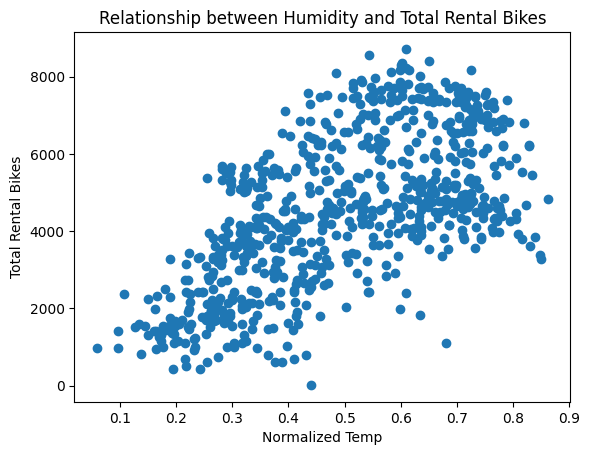

In [36]:
# Question 6: What is the relationship between temp and the number of rental bikes?
plt.scatter(df['temp normalized'], df['total rental bikes'])
plt.title('Relationship between Humidity and Total Rental Bikes')
plt.xlabel('Normalized Temp')
plt.ylabel('Total Rental Bikes')
plt.show()

**Interpret**: Positive correlation, rental bikes increases when temp is higher

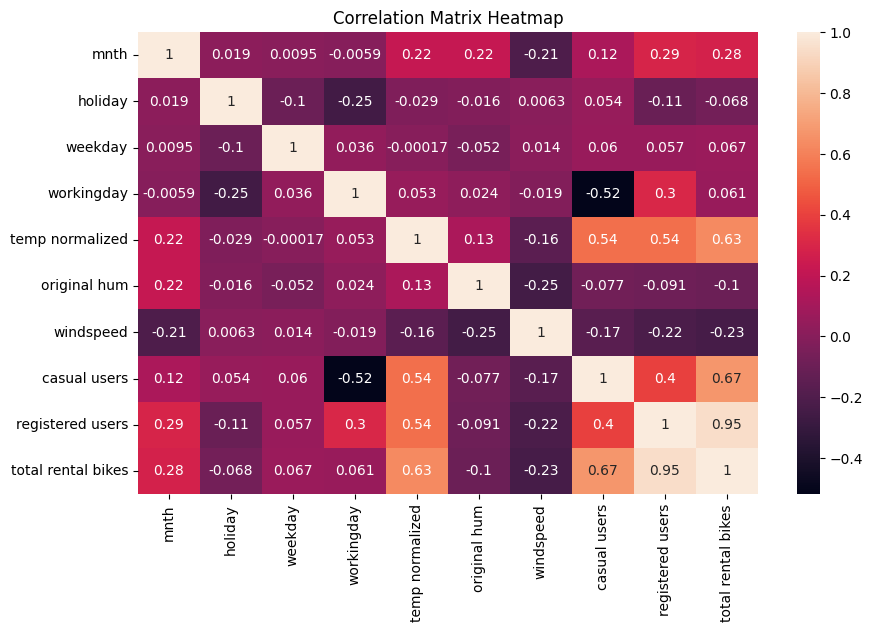

In [43]:
#Question 7: Create the Correlation matrix heatmap to visualize correlations between pairs of numeric variables.
import seaborn as sns
import numpy as np

# Calculate the correlation matrix
numeric_df = df.select_dtypes(include='number')
correlation_matrix = np.corrcoef(numeric_df, rowvar=False)
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,annot=True, xticklabels=numeric_df.columns, yticklabels=numeric_df.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

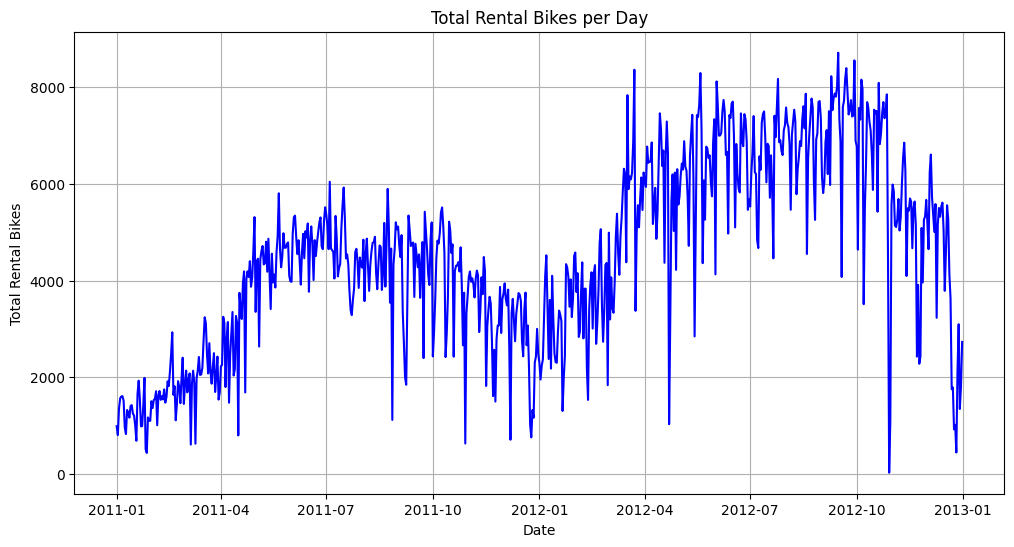

In [46]:
#Question 8: Create Lineplot to display time series data of Total Rental Bikes per day
plt.figure(figsize=(12, 6))
plt.plot(df['rent date'], df['total rental bikes'], color='blue')
plt.title('Total Rental Bikes per Day')
plt.xlabel('Date')
plt.ylabel('Total Rental Bikes')
plt.grid(True)
plt.show()